In [15]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 22 13:11:24 2020

@author: Lappawat
"""
import numpy as np
import random 
import matplotlib.pyplot as plt

### Real data[1000,1030,1060,1130,1150,1240,1410,1460,1470,1770,2120,2720,3220,4110,5990,7210,8270,9340,10450,11360]
real_infected = [1000,1030,1060,1130,1150,1240,1410,1460,1470,1770,2120,2720,3220,4110,5990,7210,8270,9340,10450,11360,12450]
date = np.arange(0,len(real_infected))
print(date)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


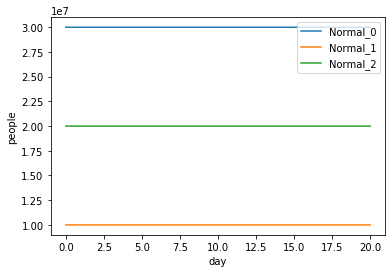

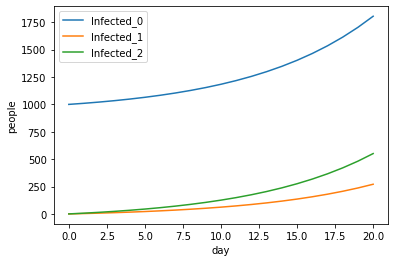

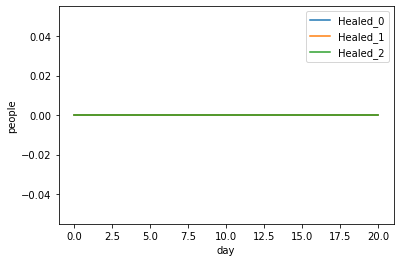

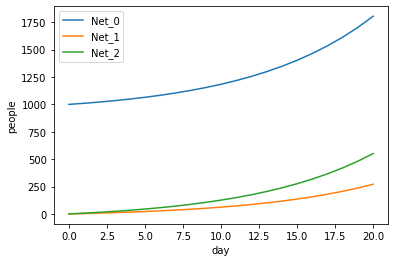

In [16]:

### Prediction
############### Parameters ##########################
x=10
inft =100*x        # initial infected people
length  =20    # predicted length (days)
meeting  =10    # 1 infected people can meet 20 people
healed_day= 21     # infected people will be healed in 7 days after being infected
#x=1
H=30000000
M=10000000
R=20000000
# Define 3 classes of people depending on how to response
# 0 H = (Highy responsible)
# 1 M = (Moderately responsible)
# 2 R = (Risky)
Pop       = [H,M,R]
Pop_tot   = sum(Pop)
Rh=0.02
Rm=0.1
Rr=0.32
R_lst     = [Rh,Rm,Rr] # contact rate
init_infect  = [inft,0,0]
#..............................#
for i in range(len(Pop)):
    Pop[i] = Pop[i]-init_infect[i]

#Day 0
day      = [0]
Normal   = [[] for i in range(len(Pop))] # never being infected
Infect   = [[] for i in range(len(Pop))] # sum of being infected and used to
Heal     = [[] for i in range(len(Pop))] # be healed
Net      = [[] for i in range(len(Pop))] # still being infected
for i in range(len(Pop)):
    Normal[i].append(Pop[i])     
    Infect[i].append(init_infect[i])          
    Heal[i].append(0)                   
    Net[i].append(Infect[i][0] - Heal[i][0])  

#begin model
for i in range(length):
    day.append(i+1)
    ### group j meet k
    for j in range(len(Pop)):
        new_infect = 0
        for k in range(len(Pop)):
            Rate  = R_lst[1]*R_lst[k]*meeting
            ### new total infected people
            new_infect = new_infect + Rate*Net[k][-1]*Normal[j][-1]/Pop_tot
        Infect[j].append(Infect[j][-1] + new_infect)
        
        ### new normal people
        Normal[j].append(Normal[j][-1]-new_infect)
        ### new healed people
        if i <= healed_day:
            Heal[j].append(0)
        else:
            new_healed = Infect[j][i-healed_day]-Infect[j][i-healed_day-1]
            Heal[j].append(Heal[j][-1]+new_healed)
        ### new net
        Net[j].append(Infect[j][-1]-Heal[j][-1])
        ##print('day: %2d Normal: %10.1f Infected: %10.1f Healed: %10.1f Net: %10.1f //%10.1f' %(i,Normal[j][-1],Infect[j][-1],Heal[j][-1],Net[j][-1],new_infect))

#plt.plot(date, real_infected, 'ro', label='real')
for j in range(len(Pop)):
    plt.plot(day,Normal[j],'-',label ="Normal_"+str(j))
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
    
for j in range(len(Pop)):
    plt.plot(day,Infect[j],'-',label ="Infected_"+str(j))
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
    
for j in range(len(Pop)):
    plt.plot(day,Heal[j],'-',label ="Healed_"+str(j))
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
    
for j in range(len(Pop)):
    plt.plot(day,Net[j],'-',label ="Net_"+str(j))
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
 
    #changing list into nparray
Normal = np.array(Normal)
Infect = np.array(Infect)
Heal   = np.array(Heal)
Net    = np.array(Net)
Normal_sum = np.zeros(len(Normal[0]))
Infect_sum = np.zeros(len(Infect[0]));
Heal_sum = np.zeros(len(Heal[0]))
Net_sum = np.zeros(len(Net[0]))
for j in range(len(Pop)):
    Normal_sum = Normal_sum + Normal[j]
    Infect_sum = Infect_sum + Infect[j]
    Heal_sum   = Heal_sum   + Heal[j]
    Net_sum    = Net_sum    + Net[j]



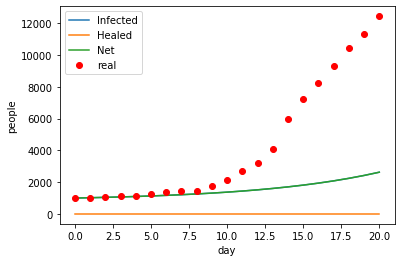

In [18]:
#plt.plot(day,Normal_sum,'-',label ="Normal")
plt.plot(day,Infect_sum,'-',label ="Infected")
plt.plot(day,Heal_sum,'-',label ="Healed")
plt.plot(day,Net_sum,'-',label ="Net")
plt.plot(date,real_infected, 'ro', label='real')
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
    


In [14]:
A=0
for i in range(length):
    A=A+(Net_sum[i]-real_infected[j])
    i=i+1
print(A)

8239.862491520396
